## Accessing and working with a dataset

### Access to the directory in the file system

The datasets selected for working are mounted in `/home/chameleon/datasets/` or simply `~/datasets/`.

In [73]:
import os
datasets_dir_path = "/home/chaimeleon/datasets"
datasets = os.listdir(datasets_dir_path)
datasets

['13f5b9f0-c75b-4775-90f0-3ff6806924c6']

This is the ID of the dataset we have selected for this example.  
Let's see the contents...

In [84]:
dataset = datasets[0]
dataset_dir_path = os.path.join(datasets_dir_path, dataset)
print(dataset_dir_path)
contents = os.listdir(dataset_dir_path)
print(contents[0:5])

/home/chaimeleon/datasets/13f5b9f0-c75b-4775-90f0-3ff6806924c6
['gp0XXnBwp2', 'Bmg9dXUVba', 'n233UAGDdJ', 'QZnl3Udrw1', 'GCFABFZ3p7']


Those are the first five entries which are directories of subjects, but the dataset directory not only contains subject directories, it contains other things like the files `index.json` and `eforms.json`.

### Reading `index.json` file

It is the entry point for accessing the contents of a dataset. It contains a list of the studies composing the dataset. Here is the JSON schema:  
https://github.com/chaimeleon-eu/dataset-service/blob/main/index.schema.json

Let's read and parse as JSON...

In [87]:
import json
index_file_path = os.path.join(dataset_dir_path, "index.json")
with open(index_file_path) as f:
    studies = json.load(f)

Now we can see the properties of (for example) the third study of the dataset simply with:

In [98]:
studies[2]

{'studyId': '641d6de6315ee90001fc625c',
 'studyName': 'Rm, Pélvica',
 'subjectName': 'S51aovceth',
 'url': 'https://chaimeleon-eu.i3m.upv.es/omni/#/<USER>/study/641d6de6315ee90001fc625c/serie/641d6de6315ee90001fc625a',
 'series': [{'folderName': '12826013680043104365912646418522955534748681156487788034',
   'tags': []},
  {'folderName': '12826013680043104362262258360899345034436124143142583977',
   'tags': []},
  {'folderName': '12826013680043104362471270606879137339530306777714173671',
   'tags': []},
  {'folderName': '12826013680043104363154889533086961174566201666552426020',
   'tags': []},
  {'folderName': '12826013680043104362568363477881483868385620688677254220',
   'tags': []},
  {'folderName': '12826013680043104361923747300485663976015106958300497701',
   'tags': []},
  {'folderName': '12826013680043104361502014460482244753552752611924643359',
   'tags': []},
  {'folderName': '12826013680043104361522033029664800813939765705023438245',
   'tags': []},
  {'folderName': '128260136

If we want to access the DICOM files, we must concatenate the `path` of the study and the `folderName` of the selected series. Let's see the contents of the third series:

In [106]:
study = studies[2]
series = study["series"][2]
serie_dir_path = os.path.join(dataset_dir_path, study["path"], series["folderName"])
images = [file for file in os.listdir(serie_dir_path) if file.endswith(".dcm")]
print(f"{len(images)} images in that series")
print(images[0:3])

59 images in that series
['1.2.826.0.1.3680043.10.436.4960936304077833261280502181833523005.dcm', '1.2.826.0.1.3680043.10.436.3986658176937937195437765749945795696.dcm', '1.2.826.0.1.3680043.10.436.1981260317456249058935265746393839062.dcm']


And finally we can see one of the images with:

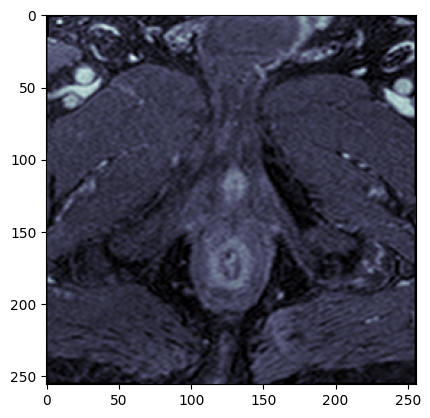

In [104]:
import matplotlib.pyplot as plt
import pydicom
dcm_file_path = os.path.join(serie_dir_path, images[3])
ds = pydicom.dcmread(dcm_file_path)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

Also the DICOM tags...

In [105]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.436.2622794890640792128843626466113472002
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.3
(0002, 0013) Implementation Version Name         SH: 'dcm4che-5.29.0'
(0002, 0016) Source Application Entity Title     AE: 'DCM4CHEE'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0012) Instance Creation Date              DA: '20180101'
(0008, 0013) Instance Creation Time              TM: '182840'


## APPLICATION EXECUTION

Now we are going to execute an example of application which scans a dataset and filters it taking out only the studies and series with a selected orientation.

If we execute the application without arguments, we can see which arguments are required.

In [27]:
!python3 ~/persistent-shared-folder/APPLICATION-EXAMPLES/filter-series-by-orientation.py

Error: three arguments are required. 
       - The first is the input, the directory path of the dataset to filter,
         that directory should contain an index.json file.
       - The second is the filter: X_TRANSVERSE, Y_CORONAL or Z_SAGITTAL.
       - The third is the output file path where the filtered index will be written,
         only the studies and series with the orientation selected will be included.

Usage example: 
   python3 /home/chaimeleon/persistent-shared-folder/APPLICATION-EXAMPLES/filter-series-by-orientation.py datasets/e52faf1b-ecc2-4a96-957d-c8b4e34d607a Y_CORONAL persistent-home/e52faf1b-coronal-index.json



So, let's filter our dataset. We want to take out for example the sagittal series.

In [40]:
!python3 ~/persistent-shared-folder/APPLICATION-EXAMPLES/filter-series-by-orientation.py \
         ~/datasets/13f5b9f0-c75b-4775-90f0-3ff6806924c6 \
         Z_SAGITTAL \
         ~/persistent-home/index-prostate-sagittal.json

.........................................................................................
# Input studies: 89
##### Input series #####
# X_TRANSVERSE:      129
# Y_CORONAL:         129
# Z_SAGITTAL:        853
# UNDEFINED:           0
########################
# Output studies: 89
# Output series: 853

Writing filtered INDEX: /home/chaimeleon/persistent-home/index-prostate-sagittal.json



### Launching with _jobman_

When you need to execute some application that require more computational resources, specially for using GPU, you must launch the job with _jobman_. You can use `jobman --help` to see all you can do with it.

We need to select an image for launch our job, let's see the list of available images...

In [1]:
!jobman images

Merging settings found in user's home at '/home/chaimeleon/.jobman/settings.json' into global settings...
Getting repos from https://harbor-core.harbor.svc.cluster.local/api/v2.0/projects/chaimeleon-library-batch/repositories
┌──────────────────────────┬──────────────────────────────────────────┐
│               Image Name │                                Tags List │
├──────────────────────────┼──────────────────────────────────────────┤
│         privacypreserver │                                      1.0 │
│     harmonisation_lungct │                                      1.0 │
│       deepfakes-detector │                                      1.0 │
│ ubuntu_python_tensorflow │ 3.1cuda11  3.1  3.0  2.2cuda10  2.2  2.1 │
│    ubuntu_python_pytorch │      3.1cuda11  3.1  3.0  2.4cuda10  2.4 │
│            ubuntu_python │                           3.1cuda11  3.1 │
└──────────────────────────┴──────────────────────────────────────────┘
npm notice 
npm notice New minor version of npm availa

For this simple example we are going to use the most basic image `ubuntu_python`.

So, for submitting the job just write down the image name with the tag and put the same command that you would execute in local after the "--" ("python3 ...", the same command executed in the previous chapter).

In [66]:
!jobman submit -i ubuntu_python:3.1 -- \
    python3 ~/persistent-shared-folder/APPLICATION-EXAMPLES/filter-series-by-orientation.py \
            ~/datasets/13f5b9f0-c75b-4775-90f0-3ff6806924c6 \
            Z_SAGITTAL \
            ~/persistent-home/index-prostate-sagittal.json

Merging settings found in user's home at '/home/chaimeleon/.jobman/settings.json' into global settings...
Parameters sent to the job's container: ["python3","/home/chaimeleon/persistent-shared-folder/APPLICATION-EXAMPLES/filter-series-by-orientation.py","/home/chaimeleon/datasets/13f5b9f0-c75b-4775-90f0-3ff6806924c6","Z_SAGITTAL","/home/chaimeleon/persistent-home/index-prostate-sagittal-2.json"]
Using image 'harbor.chaimeleon-eu.i3m.upv.es/chaimeleon-library-batch/ubuntu_python:3.1'
Preparing volumes...
 [SUCCESS]  Job named 'job-50efb9b3-83a5-4e88-8f6f-c2d3a7046b07' created successfully by user 'inClusterUser'


Now the job is created and we can see the status...

In [72]:
!jobman list

Merging settings found in user's home at '/home/chaimeleon/.jobman/settings.json' into global settings...
┌──────────────────────────────────────────┬───────────┬──────────────────────────┐
│                                 Job Name │    Status │           Launching Date │
├──────────────────────────────────────────┼───────────┼──────────────────────────┤
│ job-147f7f17-fa0b-4252-bc5a-10e64662d38a │ Succeeded │ 31/03/2023, 15:38:56 UTC │
└──────────────────────────────────────────┴───────────┴──────────────────────────┘


The job will be enqueued and depending on the current demand on the cluster and the resources we require (if we require a GPU for example or not), the job will finish sooner or later.  
When finished (succeeded or failed) we can see the output with:

In [68]:
!jobman log -j job-147f7f17-fa0b-4252-bc5a-10e64662d38a

Merging settings found in user's home at '/home/chaimeleon/.jobman/settings.json' into global settings...
Getting log for pod 'job-147f7f17-fa0b-4252-bc5a-10e64662d38a-n6mrc', user 'inClusterUser' in namespace 'user-testdatascientist'
----Log begin----

  .........................................................................................
# Input studies: 89
##### Input series #####
# X_TRANSVERSE:      129
# Y_CORONAL:         129
# Z_SAGITTAL:        853
# UNDEFINED:           0
########################
# Output studies: 89
# Output series: 853

Writing filtered INDEX: /home/chaimeleon/persistent-home/index-prostate-sagittal.json

  
----Log end----
